<a href="https://colab.research.google.com/github/YosefOwenManullang/Support-Vector-Machine-Owen/blob/main/YosefOwenManullang_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yosef Owen Manullang
This project is a project to complete the Artificial Nervous System course which uses the Support Vector Machine method, in which some data is classified.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sistem Syaraf Buatan/DataSet',',')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk
0,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,00-04,Laki-laki,381
1,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,05-09,Laki-laki,360
2,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,01-10,Laki-laki,308
3,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,15-19,Laki-laki,308
4,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,20-24,Laki-laki,344
...,...,...,...,...,...,...,...,...
8539,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,55-59,Perempuan,527
8540,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,60-64,Perempuan,410
8541,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,65-69,Perempuan,279
8542,2021,DKI Jakarta,JAKARTA TIMUR,CIPAYUNG,CEGER,70-74,Perempuan,128


In [ ]:
df.shape

(8544, 8)

In [ ]:
df.columns

Index(['tahun', 'nama_provinsi', 'nama_kabupaten_kota', 'nama_kecamatan',
       'nama_kelurahan', 'usia', 'jenis_kelamin', 'jumlah_penduduk'],
      dtype='object')

In [ ]:
df.head()

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk
0,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,00-04,Laki-laki,381
1,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,05-09,Laki-laki,360
2,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,01-10,Laki-laki,308
3,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,15-19,Laki-laki,308
4,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,20-24,Laki-laki,344


In [ ]:
df.shape

(8544, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['nama_kecamatan'] = lb.fit_transform(df['nama_kecamatan'])
df

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk
0,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,21,PULAU PANGGANG,00-04,Laki-laki,381
1,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,21,PULAU PANGGANG,05-09,Laki-laki,360
2,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,21,PULAU PANGGANG,01-10,Laki-laki,308
3,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,21,PULAU PANGGANG,15-19,Laki-laki,308
4,2021,DKI Jakarta,ADM. KEPULAUAN SERIBU,21,PULAU PANGGANG,20-24,Laki-laki,344
...,...,...,...,...,...,...,...,...
8539,2021,DKI Jakarta,JAKARTA TIMUR,5,CEGER,55-59,Perempuan,527
8540,2021,DKI Jakarta,JAKARTA TIMUR,5,CEGER,60-64,Perempuan,410
8541,2021,DKI Jakarta,JAKARTA TIMUR,5,CEGER,65-69,Perempuan,279
8542,2021,DKI Jakarta,JAKARTA TIMUR,5,CEGER,70-74,Perempuan,128


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun,8544.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.00,2021.0
nama_kecamatan,8544.0,22.044944,13.140391,0.0,10.0,22.0,34.00,43.0
jumlah_penduduk,8544.0,1318.070576,1050.821847,9.0,489.0,1112.5,1831.25,8491.0


In [ ]:
x=df.iloc[:,1:32].values # = x

y=df.iloc[:,0].values # = y

<function matplotlib.pyplot.ioff>

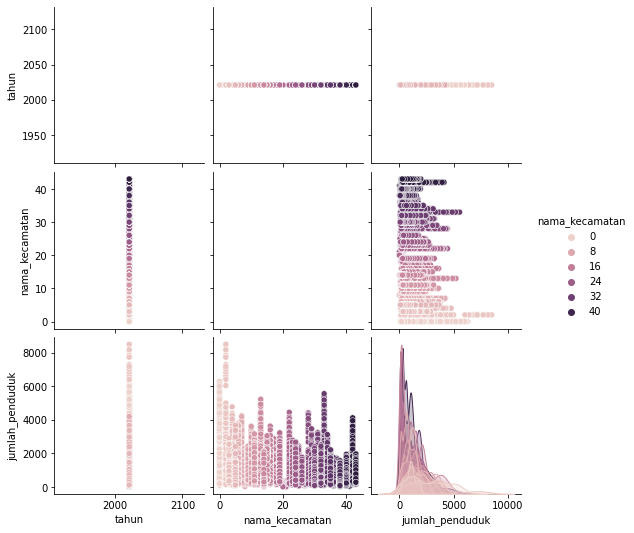

In [ ]:
sns.pairplot(df,vars=['tahun', 'nama_kecamatan', 'jumlah_penduduk'], hue='nama_kecamatan')

plt.ioff

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


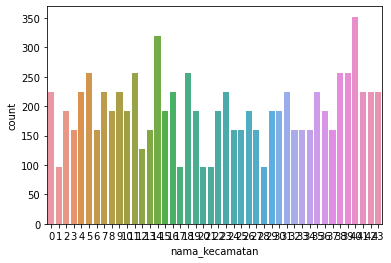

In [ ]:
sns.countplot(df['nama_kecamatan'])
plt.ioff()